In [ ]:
# load dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
# load the iris dataset
df = sns.load_dataset("iris").dropna()
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# selecting relevant numerical features for classification
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # numeric features
y = df['species']  # target variable

In [ ]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# train decision tree classifier model
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)  # limit depth for visualization
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# make predictions
y_pred = dt_classifier.predict(X_test)

In [ ]:
# evaluate model
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

F1 Score: 1.0
Accuracy: 1.0


In [ ]:
# creating arrays to parse the tree structure
n_nodes = dt_classifier.tree_.node_count
children_left = dt_classifier.tree_.children_left
children_right = dt_classifier.tree_.children_right
feature = dt_classifier.tree_.feature
threshold = dt_classifier.tree_.threshold

# parsing the tree structure
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # the seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # Exploring the test mode
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

The binary tree structure has 13 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 2] <= 2.449999988079071 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.75 else to node 6.
		node=3 test node: go to node 4 if X[:, 3] <= 1.6500000357627869 else to node 5.
			node=4 leaf node.
			node=5 leaf node.
		node=6 test node: go to node 7 if X[:, 3] <= 1.75 else to node 10.
			node=7 test node: go to node 8 if X[:, 2] <= 4.950000047683716 else to node 9.
				node=8 leaf node.
				node=9 leaf node.
			node=10 test node: go to node 11 if X[:, 2] <= 4.8500001430511475 else to node 12.
				node=11 leaf node.
				node=12 leaf node.


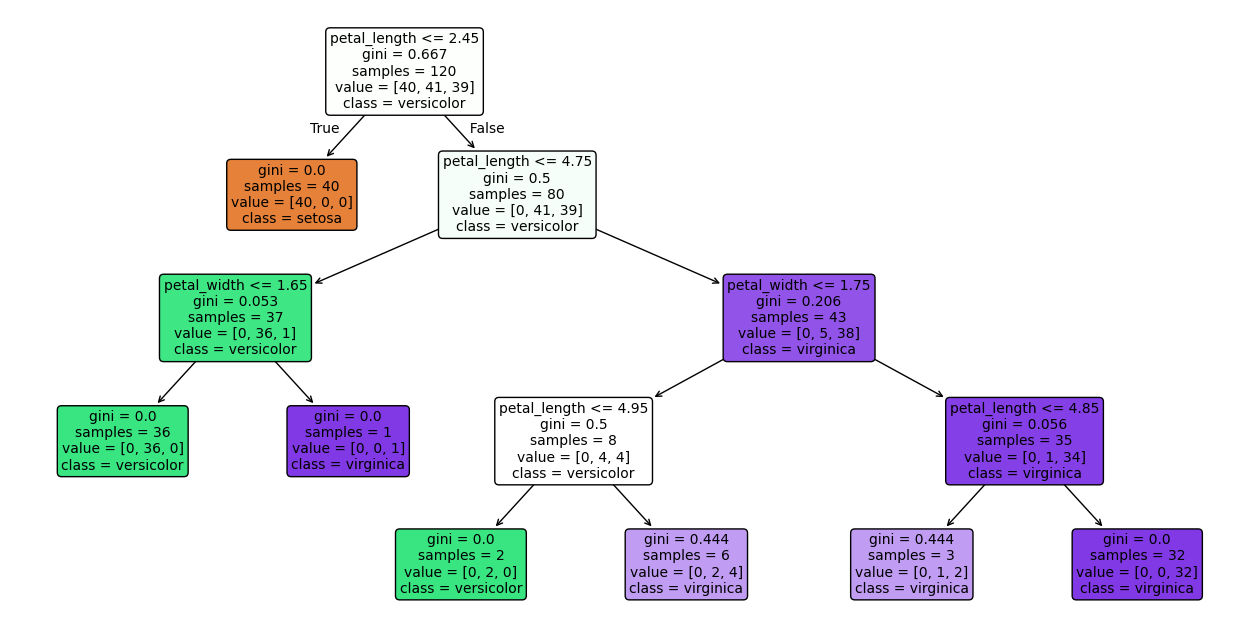

In [ ]:
# visualize decision tree
plt.figure(figsize=(16, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.show()